# Assignment 1 : SMS Spam Classification

## Importing Libraries

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

## Loading training, validation, test data

In [8]:
train=pd.read_csv("Training Data.csv")
val=pd.read_csv("Validation Data.csv")
test=pd.read_csv("Test Data.csv")

In [9]:
train.head()

,Message,Label
0,need coffee run tomocant believe time week alr...,0
1,need say anything know outsider,0
2,hit move,0
3,yup thk e shop close lor,0
4,ran younger man make pretty baby together,0


In [10]:
val.head()

,Message,Label
0,oh god ive found number im glad text back xaft...,1
1,please leave topicsorry telling,0
2,hello hello hi lou sorry took long 2 reply lef...,0
3,k actually guy meet sunoco howard right way,0
4,dun b sad dun thk abt already concentrate ur p...,0


In [11]:
test.head()

,Message,Label
0,oh k kbut big hitteranyway good,0
1,world suffers lot violence bad people silence ...,0
2,wan2 win meetgreet westlife 4 u m8 currently t...,1
3,dip cell dead coming u better respond else sha...,0
4,tot u reach liao said tshirt,0


In [12]:
y_train,X_train=train["Label"],train["Message"]
y_val,X_val=val["Label"],val["Message"]
y_test,X_test=test["Label"],test["Message"]

## Converting string to vectors, to give as input to the models

In [13]:
# replacing NAN entries by empty string
X_train = X_train.replace(np.nan, '', regex=True)
X_val = X_val.replace(np.nan, '', regex=True)
X_test = X_test.replace(np.nan, '', regex=True)

In [14]:
vector = CountVectorizer()
X_train_vec=vector.fit_transform(X_train)
X_val_vec=vector.fit_transform(X_val)
X_test_vec=vector.fit_transform(X_test)

In [15]:
X_train_vec.shape

(4026, 7432)

In [16]:
X_train_vec.nnz

34389

In [17]:
# Sparsity %
X_train_vec.nnz*100/(X_train_vec.shape[0]*X_train_vec.shape[1])

0.11493176484176855

In [18]:
X_val_vec.shape

(711, 2532)

In [19]:
X_val_vec.nnz

6004

In [20]:
# Sparsity %
X_val_vec.nnz*100/(X_val_vec.shape[0]*X_val_vec.shape[1])

0.3335088643145515

In [21]:
X_test_vec.shape

(837, 2730)

In [22]:
X_test_vec.nnz

6960

In [23]:
# Sparsity %
X_test_vec.nnz*100/(X_test_vec.shape[0]*X_test_vec.shape[1])

0.30459385298094976

In [24]:
tfidf_transformer = TfidfTransformer()
tfidf_train = tfidf_transformer.fit_transform(X_train_vec)
tfidf_val = tfidf_transformer.fit_transform(X_val_vec)
tfidf_test = tfidf_transformer.fit_transform(X_test_vec)

In [25]:
tfidf_train.shape,tfidf_val.shape,tfidf_test.shape

((4026, 7432), (711, 2532), (837, 2730))

## Training Models

# Multinomial Naive Bayes

In [26]:
mnb = MultinomialNB()
mnb.fit(tfidf_train,y_train)

print('training accuracy is --> ',mnb.score(tfidf_train,y_train)*100)

training accuracy is -->  97.7645305514158


In [27]:
mnb = MultinomialNB()
mnb.fit(tfidf_val,y_val)

print('Validation accuracy is --> ',mnb.score(tfidf_val,y_val)*100)

Validation accuracy is -->  94.9367088607595


In [28]:
mnb = MultinomialNB()
mnb.fit(tfidf_test,y_test)

print('Test accuracy is --> ',mnb.score(tfidf_test,y_test)*100)

Test accuracy is -->  95.4599761051374


In [29]:
y_pred = mnb.predict(tfidf_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       722
           1       1.00      0.67      0.80       115

    accuracy                           0.95       837
   macro avg       0.97      0.83      0.89       837
weighted avg       0.96      0.95      0.95       837



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


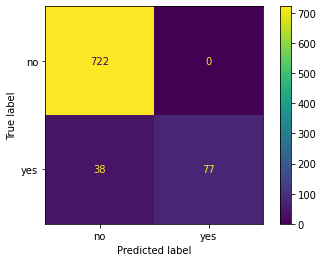

In [31]:
plot_confusion_matrix(mnb ,tfidf_test,y_test,display_labels=['no','yes'])

# Logistic Regression

In [32]:
lr = LogisticRegression()
lr.fit(tfidf_train,y_train)
print('training accuracy is --> ',lr.score(tfidf_train,y_train)*100)

training accuracy is -->  96.34873323397913


In [33]:
lr = LogisticRegression()
lr.fit(tfidf_val,y_val)
print('Validation accuracy is --> ',lr.score(tfidf_val,y_val)*100)

Validation accuracy is -->  89.17018284106891


In [34]:
lr = LogisticRegression()
lr.fit(tfidf_test,y_test)
print('Test accuracy is --> ',lr.score(tfidf_test,y_test)*100)

Test accuracy is -->  89.72520908004779


In [35]:
y_pred = lr.predict(tfidf_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       722
           1       1.00      0.25      0.40       115

    accuracy                           0.90       837
   macro avg       0.95      0.63      0.67       837
weighted avg       0.91      0.90      0.87       837



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


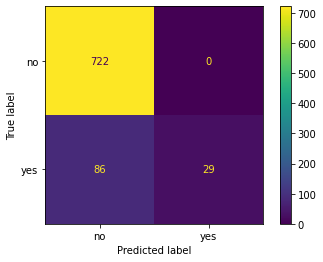

In [37]:
plot_confusion_matrix(lr ,tfidf_test,y_test,display_labels=['no','yes'])

# MLP Classifier

In [38]:
mlp = MLPClassifier()
mlp.fit(tfidf_train,y_train)
print('training accuracy is --> ',mlp.score(tfidf_train,y_train)*100)

training accuracy is -->  100.0


In [39]:
mlp.fit(tfidf_val,y_val)
print('Validation accuracy is --> ',mlp.score(tfidf_val,y_val)*100)

Validation accuracy is -->  100.0


In [40]:
mlp.fit(tfidf_test,y_test)
print('Test accuracy is --> ',mlp.score(tfidf_test,y_test)*100)

Test accuracy is -->  100.0


In [41]:
y_pred = mlp.predict(tfidf_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       722
           1       1.00      1.00      1.00       115

    accuracy                           1.00       837
   macro avg       1.00      1.00      1.00       837
weighted avg       1.00      1.00      1.00       837



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


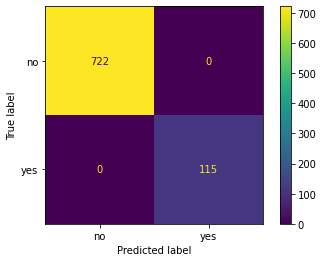

In [43]:
plot_confusion_matrix(mlp ,tfidf_test,y_test,display_labels=['no','yes'])

Since our aim is to reduce FN, hence increasing recall, MLP classifier suits best, according to accuracy as well as recall criteria.